## Objectives:
- define a vector and calculate a vector length and dot product
- define a matrix and calculate a matrix dot product, transpose, and inverse
- explain cosine similarity and compute the similarity between two vectors
- use linear algebra to solve for linear regression coefficients

# Yesterday...

We built a linear model where we determined that long bone nitrogen composition and burial application of Quicklime (yes or no) were the best predictors of length of interment.

That was a good practical exercise in model building, but it should leave us with two big questions.



1.   What was the computer doing "behind the scenes" to calculate the slope and intercept from our data?
2.   What would we do if we had so many predictors we could never evaluate each "by hand" the way we did in the longbones example.





## Linear Algebra - Introduction

### What was the computer doing "behind the scenes" to calculate the slope and intercept from our data?

The above is a question that you should be asking youself through this course. While computers are fast and accurate, they can only do what we ask them to do. It's the human's job to understand *what* we are asking the computer to do.

So far, the computer has been handling all of the math (and linear algebra) operations. But, now it's our turn to learn a little more about these concepts and how we apply them to learn about data.

### Vectors

We've already used vectors many times in this course, so this data structure is probably familiar. Let's start with a *vector*, represented here with the small arrow over the lower-case *a*:

$$\vec{a} = \begin{bmatrix}3 & 4\end{bmatrix}$$ 

This is a two-dimensional vector and is easy to plot:

In [ ]:
import matplotlib.pyplot as plt

# Create the vector
vector = [3, 4]

plt.arrow(0, 0, vector[0], vector[1], width=.05)
plt.xlim(-1, 4); plt.ylim(-1, 5)

We just plotted a two-dimensional vector. But vectors can have many more dimensions! Here is a 10-dimensional vector:

$$\vec{a} = \begin{bmatrix}3 & 4 & 5 & 9 & 2 & 5 & 3 & 8 & 2 &6\end{bmatrix}$$

How would we plot this vector? We've could plot a three-dimensional vector if we added another dimension to our first plot above. But we can't really create plots for a vector with more than three dimensions.

But, this doesn't stop us from using vectors, representing our data in vector form, and doing various mathemetical operations with vectors.

### Vector Math

There are many excellent introductions to linear algebra so we'll keep this section short.

#### Vector length

The *length* (or *norm*) of a vector (two-dimensional or thousands of dimensions) is the sum of the squares of each element and then take the square root:

$$||\vec{a}|| = \sqrt{a_1^2 + a_2^2} = \sqrt{4^2 + 3 ^2} = \sqrt{16+9} = \sqrt{25} = 5$$

#### Vector dot product

The dot product is a kind of multiplication where we're *applying* one vector to another; let's look at the math now let the conceptual understanding come later.

We'll calculate the dot product for vectors $\vec{b}$ and $\vec{c}$:

$$
\vec{b} = \begin{bmatrix}4 & 8 & 5\end{bmatrix}
\qquad
\vec{c} = \begin{bmatrix} 6 & 2 & 5\end{bmatrix}
$$

The dot product notation looks like this:

$$\vec{b} \cdot \vec{c}$$

It represents the sum of the element-wise multiplication of the two vectors: 

$$\vec{b} \cdot \vec{c} = b_{1}c_{1} + b_{2}c_{2} + b_{3}c_{3}$$
$$ = (4)(6) + (8)(2) + (5)(5) $$
$$ = 24 + 16 + 25 $$
$$ = 65 $$



That's a quick overview of vectors and some of the mathematical operations. Now, what if we consider a data structure that contains more than one vector? 

###Matricies

A **matrix** is a rectangular grid of numbers arranged in rows and columns. Variables that represent matrices are typically written as capital letters (boldfaced as well if you want to be super formal).

\begin{align}
A = 
    \begin{bmatrix}
           1 & 2 & 3\\
           4 & 5 & 6\\
           7 & 8 & 9
    \end{bmatrix}
    \qquad
    B = \begin{bmatrix}
           1 & 2 & 3\\
           4 & 5 & 6
    \end{bmatrix}
 \end{align}


The number of rows and columns that a matrix has is called its **dimension**.

When listing the dimension of a matrix we always list rows first and then columns. 

The dimension of matrix A is 3x3. (Note: This is read "Three by Three", the 'x' isn't a multiplication sign.)

#Using linear algebra to model the relationship of long bone nitrogen composition to interment time.

In linear regression, the formula that relates every value of x to its value of y is  

$$y_i = b_0 + b_1x_i + \epsilon_i$$

Where $y_i$ is y value for the ith individual, $x_i$ is the x-value for the ith individual and $\epsilon_i$ is the residual for the ith individual.  



###We input all the values of $x_i$ and $y_i$ into matricies and use those to solve for $b_0$ and $b_1$

In [ ]:
#Import the Longbones.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Longbones/Longbones.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

#Drop records with NAs and rename the dataset longbones

longbones = df.dropna()

longbones.head()

Regression model for the ith individual

$$y_i = b_0 + b_1x_i + \epsilon_i$$

For the first individual in the longbones, dataset, 

$$y_1 = b_0 + b_1x_1 +\epsilon_1$$

$$71.8 = b_0 + b_1(3.88) + \epsilon_1$$

$\qquad$

For the second individual...

$$70.6 = b_0 + b_1(3.53) + \epsilon_2$$

To simplify the notation, we can put all the x-values into a matrix we call X and all the y-values into a matrix we call Y.

\begin{align}
  Y = 
\begin{bmatrix}
  71.8 \\
  70.6 \\
  68.0 \\
  71.6 \\
  70.2 \\
  ...
\end{bmatrix} 
  \qquad
  X = 
  \begin{bmatrix}
  1 \quad 3.88 \\
  1 \quad 3.53  \\
  1 \quad 3.93  \\
  1 \quad 3.88  \\
  1 \quad 3.64  \\
  1 \quad ...
  \end{bmatrix}
\end{align}



We can also put our regression coefficients and residuals in matricies:

\begin{align}
  B = 
\begin{bmatrix}
  b_0 \\
  b_1 \\
\end{bmatrix} 
  \qquad
  \epsilon = 
  \begin{bmatrix}
  \epsilon_1 \\
  \epsilon_2  \\
  \epsilon_3  \\
  \epsilon_4  \\
  \epsilon_5  \\
  ...
  \end{bmatrix}
\end{align}



The regression model in matrix form is:

$$Y = XB + E$$


\begin{align}
\begin{bmatrix}
  71.8 \\
  70.6 \\
  68.0 \\
  71.6 \\
  70.2 \\
  ...
\end{bmatrix} 
   = 
   \begin{bmatrix}
  1 \quad 3.88 \\
  1 \quad 3.53  \\
  1 \quad 3.93  \\
  1 \quad 3.88  \\
  1 \quad 3.64  \\
  1 \quad ...
\end{bmatrix}
\begin{bmatrix}
  b_0 \\
  b_1 \\
\end{bmatrix} 
  +
\begin{bmatrix}
  \epsilon_1 \\
  \epsilon_2  \\
  \epsilon_3  \\
  \epsilon_4  \\
  \epsilon_5  \\
  ...
\end{bmatrix}
\end{align}

###Matrix addition works element-wise

\begin{align}
\begin{bmatrix}
  2 \\
  5 \\
  9 \\
  1 \\
  6 \\
\end{bmatrix} 
+
\begin{bmatrix}
  1 \\
  3 \\
  11 \\
  2 \\
  0 \\
\end{bmatrix} 
   = 
   \begin{bmatrix}
  3 \\
  8  \\
  20  \\
  3 \\
  6 \\
\end{bmatrix}
\end{align}

### Matrix Multiplication

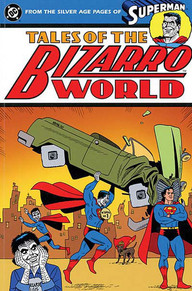

You can multipy any two matrices where the number of  columns of the first matrix is equal to the number of rows of the second matrix.

The unused dimensions of the factor matrices tell you what the dimensions of the product matrix will be.

![Matrix Multiplication Dimensions](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRunZv20HXxTMUgrkfdER06lPnMj0HpwDU_2i4IEHsBM5098440Jw)

There is no commutative property of matrix multiplication (you can't switch the order of the matrices and always get the same result). 

Matrix multiplication is best understood in terms of the **dot product**.

\begin{align} \vec{a} \cdot \vec{b} = (a_{1} \times b_{1}) + (a_{2} \times b_{2}) + \ldots + ( a_{n} \times b_{n}) \end{align}

To multiply to matrices together, we will take the dot product of each row of the first matrix with each column of the second matrix. The position of the resulting entries will correspond to the row number and column number of the row and column vector that were used to find that scalar. Lets look at an example to make this more clear.

![Dot Product Matrix Multiplication](https://www.mathsisfun.com/algebra/images/matrix-multiply-a.svg)

\begin{align}
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix} 
\times
\begin{bmatrix}
7 & 8 \\
9 & 10 \\
11 & 12
\end{bmatrix} 
=
\begin{bmatrix}
(1)(7)+(2)(9)+(3)(11) & (1)(8)+(2)(10)+(3)(12)\\
(4)(7)+(5)(9)+(6)(11) & (4)(8)+(5)(10)+(6)(12)
\end{bmatrix}
=
\begin{bmatrix}
(7)+(18)+(33) & (8)+(20)+(36)\\
(28)+(45)+(66) & (32)+(50)+(72)
\end{bmatrix}
=
\begin{bmatrix}
58 & 64\\
139 & 154
\end{bmatrix}
\end{align}

$\qquad$

Returning to the Longbones example:

$$X \times B = XB$$
$\qquad$

\begin{align}
   \begin{bmatrix}
  1 \quad 3.88 \\
  1 \quad 3.53  \\
  1 \quad 3.93  \\
  1 \quad 3.88  \\
  1 \quad 3.64  \\
  1 \quad ...
\end{bmatrix}
\begin{bmatrix}
  b_0 \\
  b_1 \\
\end{bmatrix} 
  =
\begin{bmatrix}
  b_0 + 3.88b_1 \\
  b_0 + 3.53b_1  \\
  b_0 + 3.93b_1 \\
  b_0 + 3.88b_1  \\
  b_0 + 3.64b_1  \\
  ...
\end{bmatrix}
\end{align}

$$Y = XB + \epsilon$$

$\qquad$
\begin{align}
\begin{bmatrix}
  71.8 \\
  70.6 \\
  68.0 \\
  71.6 \\
  70.2 \\
  ...
\end{bmatrix} 
   = 
\begin{bmatrix}
  b_0 + 3.88b_1 \\
  b_0 + 3.53b_1  \\
  b_0 + 3.93b_1 \\
  b_0 + 3.88b_1  \\
  b_0 + 3.64b_1  \\
  ...
\end{bmatrix}
  +
\begin{bmatrix}
  \epsilon_1 \\
  \epsilon_2  \\
  \epsilon_3  \\
  \epsilon_4  \\
  \epsilon_5  \\
  ...
\end{bmatrix}
\end{align}

###Now we want to take the equation $Y = XB + \epsilon$ and solve for B in such a way that minimizes the residuals ($\epsilon$)


This is more complicated than it sounds because 

1. The crazy rules of matrix multiplication.
2. You have to use calculus to to the "minimize the residuals" part.

###The end result is that the equation used to solve for B is 

$$ B = (X^{'}X)^{-1}X^{'}Y$$

## Transpose

A transposed matrix is one whose rows are the columns of the original and whose columns are the rows of the original.

Common notation for the transpose of a matrix is to have a capital $T$ superscript or a tick mark:

\begin{align}
A^{T}
\qquad
A^{\prime}
\end{align}

The first is read "A transpose" the second is sometimes read as "B prime" but can also be read as "A transpose".

The transpose of any matrix can be found easily by fixing the elements on the main diagonal and flipping the placement of all other elements across that diagonal.

![Matrix Transpose](http://xaktly.com/Images/Mathematics/MatrixAlgebra/MatrixOperations/MatrixTranspose.png)
  
\begin{align}
  C = 
\begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6
\end{bmatrix}
  \qquad
  C^{'} = 
  \begin{bmatrix}
  1 & 4 \\
  2 & 5 \\
  3 & 6
  \end{bmatrix}
\end{align}

## Inverse

The inverse is like the reciprocal of the matrix that was used to generate it. Just like $\frac{1}{8}$ is the reciprocal of 8, $A^{-1}$ acts like the reciprocal of $A$.  The equation for finding the inverse of a 2x2 matrix is as follows:
 
\begin{align}
A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
\qquad
A^{-1} = \frac{1}{ad-bc}\begin{bmatrix}
d & -b\\
-c & a
\end{bmatrix}
\end{align}

$\qquad$

When you multiply a matrix by its inverse, the result is what we call the identity matrix.


**Identity Matrix:** A diagonal matrix with ones on the main diagonal and zeroes everywhere else. The product of the any square matrix and the identity matrix is the original square matrix $CI == C$. Also, any matrix multiplied by its inverse will give the identity matrix as its product.  $CC^{-1} = I$


From the example above: 

\begin{align}
AA^{-1} = A^{-1}A = 
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\end{align}




### Not all matrices are invertible

Matrices that are not square are not invertible.
 
There are some other factors that can make matricies not be invertable, but we won't get into those now.

#Let's create X and Y matricies with our longbones data and use them to solve for B:





$$ B = (X^{'}X)^{-1}X^{'}Y$$

###We get the same answer!!!

#What happens if we have more than one X variable?

Now we want to include both nitrogen composition and Quicklime application in our model.

$\qquad$

Now we have 

$$X \times B = XB$$
$\qquad$

\begin{align}
   \begin{bmatrix}
  1 \quad 3.88 \quad 1 \\
  1 \quad 3.53 \quad 1  \\
  1 \quad 3.93 \quad 1 \\
  1 \quad 3.88 \quad 1 \\
  1 \quad 3.64 \quad 1 \\
  1 \quad ... \ ...
\end{bmatrix}
\begin{bmatrix}
  b_0 \\
  b_1 \\
  b_2
\end{bmatrix} 
  =
\begin{bmatrix}
  b_0 + 3.88b_1 + 1b_2\\
  b_0 + 3.53b_1 + 1b_2 \\
  b_0 + 3.93b_1 + 1b_2\\
  b_0 + 3.88b_1 + 1b_2 \\
  b_0 + 3.64b_1 + 1b_2 \\
  b_0 + ... + ...
  ...
\end{bmatrix}
\end{align}

###Pretty cool!

#All You Need is Cosine Similarity

We just talked about how to use linear regression identify the relationship between two quantitative variables.  

Cosine similarity is another way we could quantify the relationship between two variables.

Recall that a vector is a quantity with both magnitude and direction.  We can graph a 2D vector with an arrow.

In [ ]:
import matplotlib.pyplot as plt

# Create the vector
vector = [3, 4]

plt.arrow(0, 0, vector[0], vector[1], width=.05)
plt.xlim(-1, 4); plt.ylim(-1, 5)

What if we had two 2D vectors?  

In [ ]:
import matplotlib.pyplot as plt

# Create the vector
vector1 = [3, 4]
vector2 = [3, 0]

plt.arrow(0, 0, vector1[0], vector1[1], width=.05, color = 'green')
plt.arrow(0, 0, vector2[0], vector2[1], width=.05, color = 'blue')
plt.xlim(-1, 4); plt.ylim(-1, 5)

How could we measure how "similar" these vectors are?

Intuitively, we would say that two vectors that line up perfectly are "the same".

In [ ]:
import matplotlib.pyplot as plt

# Create the vector
vector1 = [3, 4]
vector2 = [3, 4]

plt.arrow(0, 0, vector1[0], vector1[1], width=.05, color = 'green')
plt.arrow(0, 0, vector2[0], vector2[1], width=.05, color = 'blue')
plt.xlim(-1, 4); plt.ylim(-1, 5)

Two vectors that are going in perpendicular directions are orthogonal to each other.

In [ ]:
import matplotlib.pyplot as plt

# Create the vector
vector1 = [-3, 4]
vector2 = [3, 4]

plt.arrow(0, 0, vector1[0], vector1[1], width=.05, color = 'green')
plt.arrow(0, 0, vector2[0], vector2[1], width=.05, color = 'blue')
plt.xlim(-4, 4); plt.ylim(-1, 5)

And two vectors that are going in opposite directions are opposites of each other.

In [ ]:
import matplotlib.pyplot as plt

# Create the vector
vector1 = [-3, -4]
vector2 = [3, 4]

plt.arrow(0, 0, vector1[0], vector1[1], width=.05, color = 'green')
plt.arrow(0, 0, vector2[0], vector2[1], width=.05, color = 'blue')
plt.xlim(-4, 4); plt.ylim(-5, 5)

One way we could measure how similar these vectors are is by looking at the degree of the angle between them.  

If vectors are exactly the same, there is no angle between them (angle = 0 degrees)

If vectors are perpendicular, there is a 90 degree angle betwen them.

If the vectors are going in opposite directions, there is a 180 degree angle between them.

How do we determine the degree of the angle between the two vectors?

Calculate the cosine!

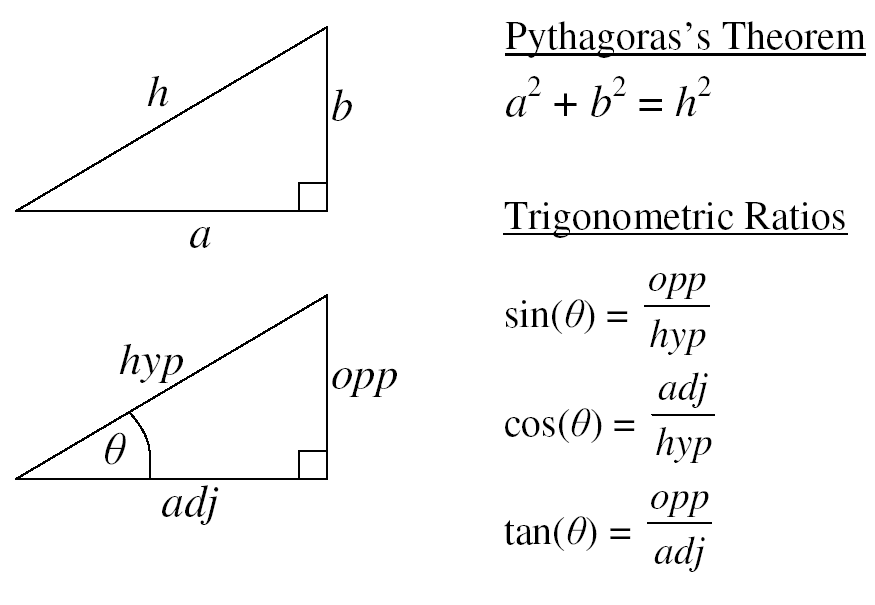

Think about one of our vectors as the adjacent side of a triangle and one as the hypotenuse.  The cosine of the angle measures the relationship of the hypotenuse and the adjacent side.  

$$\cos(\theta) = \frac{adj}{hyp}$$

When the two vectors are exactly the same $\theta=0$ and $\cos\theta=1$

When the two vectors are perpendicular to each other $\theta=90$ and $\cos\theta=0$

When the two vectors are going in opposite directions $\theta=180$ and $\cos\theta=-1$

Therefore, cosine similarity measures the relationship between two vectors on a scale of -1 to 1.

Because we're often dealing with multi-dimensional vectors, we need a more general formua to determine the cosine of the angle between the vectors.

The cosine of two non-zero vectors can be derived by using the Euclidean dot product formula:

$$\mathbf {A} \cdot \mathbf {B} =\left\|\mathbf {A} \right\|\left\|\mathbf {B} \right\|\cos \theta$$

Solving for $\cos\theta$ we get

$$\cos \theta= \frac{\mathbf {A} \cdot \mathbf {B} }{\left\|\mathbf {A} \right\|\left\|\mathbf {B} \right\|}$$

$\qquad$

The numerator is the dot product of the vectors $\mathbf {A}$ and $\mathbf {B}$

The deminator is the norm of $\mathbf {A}$ times the norm of $\mathbf {B}$


###Let's look at an example

The song writing collaboration between John Lennon and Paul McCartney was one of the most productive in music history.  Unlike many other partnerships where one individual wrote lyrics and one wrote music, Lennon and McCartney composed both, and it was decided that any song that was written would be credited to both.  In the beginning of their relationship, many of their songs were truly collabroative.  However, later on, they often worked separately with little to no input from the other.    

Because of extensive reporting on the Beatles over the years, it is generally known if a Lennon-McCartney song was a true collabortion, primarily (or totally) writen by Lennon, or primarily (or totally) written by McCartney.  

However, there are several disputed songs where both Lennon and McCartney at times claimed to be the sole (or primary) composer.

We will use cosine similarity to determine if *In My Life* (disputed) is most similar to *From Me to You* (collabortive, not disputed), *Strawberry Fields* (Lennon, not disputed) or *Penny Lane* (McCartney, not disputed).

Let's start by looking at the text of Strawberry Fields, which we know was written by John Lennon.  We can actually copy the lyrics to the entire song (removing punctuation and capitals from the first words of sentences) as a string and then convert that string into a data frame.

---



In [ ]:
import pandas as pd

#Strawberry Fields - John Lennon (not disputed)

Strawberry_ = "let me take you down cause Im going to Strawberry Fields nothing is real and nothing to get hung about Strawberry Fields forever living is easy with eyes closed misunderstanding all you see its getting hard to be someone but it all works out it doesnt matter much to me let me take you down cause Im going to Strawberry Fields nothing is real and nothing to get hung about Strawberry Fields forever no one I think is in my tree I mean it must be high or low that is you cant you know tune in but its all right that is I think its not too bad let me take you down cause Im going to Strawberry Fields nothing is real and nothing to get hung about Strawberry Fields forever always no sometimes think but you know I know when it's a dream I think er no I mean er yes but its all wrong that is I think I disagree let me take you down cause Im going to Strawberry Fields nothing is real and nothing to get hung about Strawberry Fields forever Strawberry Fields forever Strawberry Fields forever"

Strawberry_df = pd.DataFrame({"Words": Strawberry_.split()})

Strawberry_df.head()

The way we are going to determine if two songs are similar is by comparing how frequently words appear in each song. We can make a frequency table to determine how many times each word appears in Strawberry Fields.

In [ ]:
Strawberry_df_freq = pd.DataFrame(pd.crosstab(index=Strawberry_df['Words'],columns='count'))

Strawberry_df_freq[0:50]



Now let's do the same with Penny Lane - a song we know was written by McCartney

In [ ]:
import pandas as pd

#Penny Lane - Paul McCartney (not disputed)

Lane_ = "in Penny Lane there is a barber showing photographs of every head hes had the pleasure to know and all the people that come and go stop and say hello on the corner is a banker with a motorcar and little children laugh at him behind his back and the banker never wears a mac in the pouring rain very strange Penny Lane is in my ears and in my eyes there beneath the blue suburban skies I sit and meanwhile back in Penny Lane there is a fireman with an hourglass and in his pocket is a portrait of the Queen he likes to keep his fire engine clean its a clean machine Penny Lane is in my ears and in my eyes a four of fish and finger pies in summer meanwhile back behind the shelter in the middle of the roundabout the pretty nurse is selling poppies from a tray and though she feels as if shes in a play ahe is anyway in Penny Lane the barber shaves another customer we see the banker sitting waiting for a trim and then the fireman rushes in from the pouring rain very strange Penny Lane is in my ears and in my eyes there beneath the blue suburban skies I sit and meanwhile back Penny Lane is in my ears and in my eyes there beneath the blue suburban skies Penny Lane"

Lane_df = pd.DataFrame({"Words": Lane_.split()})

Lane_df_freq = pd.DataFrame(pd.crosstab(index=Lane_df['Words'],columns='count'))

Lane_df_freq[0:50]



Now we are going to concatenate the two data sets so that there is one row for each word that appears in either song and one column for each song that counts how many time that word appears in the song's lyrics.

In [ ]:
# Compare Strawberry Fields to Penny Lane

from numpy import dot
from numpy.linalg import norm

dfs = [Strawberry_df_freq, Lane_df_freq]

all_words = pd.concat(dfs, axis=1)

all_words[0:50]


We want to rename the first column so we know it is the word count from Strawberry Fields and the second column so we know it is the word count from Penny Lane.  

Also, we want to change the NaNs present to 0s because they indicate that a word that was in one song was not included in the other song.

In [ ]:

all_words = all_words.fillna(0)
all_words.columns = ["Strawberry Fields", "Penny Lane"]
all_words[0:50]


Now we can have two numeric vectors that represent the lyric frequency of each song, and we an compare them using the cosine similarity.  

In [ ]:
#cos_sim = dot product Strawberry Fields and Penny Lane / norm(Strawberry Fields) * norm (Penny Lane)
cos_sim = dot(all_words["Strawberry Fields"], all_words["Penny Lane"])/(norm(all_words["Strawberry Fields"])*norm(all_words["Penny Lane"]))

print(cos_sim)


We can use this value (cosine similarity = 0.22) as a baseline.  This is the similarity between two songs that were written by close colaborators but we know were not written by the same individual.

Let's load in two more songs: From Me to You (collaborative, not disputed) and In My Life (the disputed song)

In [ ]:
#From Me to You - Lennon and McCartney (not disputed)

Me_ = "if there's anything that you want if there's anything I can do just call on me and Ill send it along with love from me to you Ive got everything that you want like a heart thats oh so true just call on me and Ill send it along with love from me to you Ive got arms that long to hold you and keep you by my side Ive got lips that long to kiss you and keep you satisfied oh if theres anything that you want if theres anything I can do just call on me and Ill send it along with love from me to you from me to you just call on me and Ill send it along with love from me to you Ive got arms that long to hold you and keep you by my side Ive got lips that long to kiss you and keep you satisfied oh if theres anything that you want if theres anything I can do just call on me and Ill send it along with love from me to you to you to you to you"

Me_df = pd.DataFrame({"Words": Me_.split()})

Me_df_freq = pd.DataFrame(pd.crosstab(index=Me_df['Words'],columns='count'))

Me_df_freq[0:50]

In [ ]:

#In My Life - Lennon or McCartney (disputed)

Life_ = "there are places Ill remember all my life though some have changed some forever, not for better some have gone and some remain all these places had their moments with lovers and friends I still can recall some are dead and some are living in my life Ive loved them all but of all these friends and lovers there is no one compares with you and these memories lose their meaning when I think of love as something new though I know Ill never lose affection for people and things that went before I know Ill often stop and think about them in my life Ill love you more though I know Ill never lose affection for people and things that went before I know Ill often stop and think about them in my life Ill love you more in my life Ill love you more"

Life_df = pd.DataFrame({"Words": Life_.split()})

Life_df_freq = pd.DataFrame(pd.crosstab(index=Life_df['Words'],columns='count'))

Life_df_freq[0:50]



Let's compare In My Life to Penny Lane (McCartney), Strawberry Fields (Lennon) and From Me to You (Lennon, McCartney)

In [ ]:
# Compare Penny Lane to In My LIfe

from numpy import dot
from numpy.linalg import norm

dfs = [Lane_df_freq, Life_df_freq]

all_words = pd.concat(dfs, axis=1)
all_words = all_words.fillna(0)
all_words.columns = ["Penny Lane", "In My Life"]
all_words[0:50]


cos_sim = dot(all_words["Penny Lane"], all_words["In My Life"])/(norm(all_words["Penny Lane"])*norm(all_words["In My Life"]))

print(cos_sim)

In [ ]:
# Compare Strawberry Fields to In My LIfe

from numpy import dot
from numpy.linalg import norm

dfs = [Strawberry_df_freq, Life_df_freq]

all_words = pd.concat(dfs, axis=1)
all_words = all_words.fillna(0)
all_words.columns = ["Strawberry Fields", "In My Life"]
all_words[0:50]


cos_sim = dot(all_words["Strawberry Fields"], all_words["In My Life"])/(norm(all_words["Strawberry Fields"])*norm(all_words["In My Life"]))

print(cos_sim)





In [ ]:
# Compare In My Life to From Me to You

from numpy import dot
from numpy.linalg import norm

dfs = [Life_df_freq, Me_df_freq]

all_words = pd.concat(dfs, axis=1)
all_words = all_words.fillna(0)
all_words.columns = ["In My Life", "From Me to You"]
all_words[0:50]


cos_sim = dot(all_words["In My Life"], all_words["From Me to You"])/(norm(all_words["In My Life"])*norm(all_words["From Me to You"]))

print(cos_sim)


The cosine similarity between In My Life to all three other songs is higher than the cosine similarity between Strawberry Fields and Penny Lane.

It is highest between In My Life and Penny Lane, followed by From Me to You.  In My Life is least Similar to Strawberry Fields.

From the Wikipedia article about the Lennon-McCartney collaboration: In 1977, when shown a list of songs Lennon claimed writing on for the magazine Hit Parader, McCartney disputed only "In My Life". Lennon said that McCartney helped only with "the middle eight" (a short section) of the song. McCartney said that he wrote the entire melody, taking inspiration from Smokey Robinson songs.

Perhaps this analysis gives additional evidence that McCartney really did write all of In My Life.